## Extraction of images from CZI

In [19]:
import matplotlib.pyplot as plt
from aicsimageio import AICSImage

import tifffile

from aicsimageio import AICSImage

# Load the CZI file
czi = AICSImage('Akita_2_OD_25x.czi')

# Get the number of scenes
num_scenes = len(czi.scenes)

# Loop over each scene
for i in range(num_scenes):
    # Set the current scene
    czi.set_scene(i)
    
    # Get the 2D image data
    img_data = czi.get_image_data("YXZ", S=0, T=0, Z=0, C=0)
    
    # Save the image data as a TIFF file
    tifffile.imsave(f'image_{i}.tif', img_data)

C:\Users\alois\AppData\Local\Temp\ipykernel_1152\245404772.py:23: DeprecationWarning: <tifffile.imsave> is deprecated. Use tifffile.imwrite
  tifffile.imsave(f'image_{i}.tif', img_data)


In [28]:
import czifile
import tifffile
import numpy as np

def convert_czi_to_tiff(czi_file_path, tiff_file_path):
    with czifile.CziFile(czi_file_path) as czi:
        # Convert CZI file to NumPy array
        image_array = czi.asarray()
    
    # Iterate over the stacks, given your image array shape (1, 1, 1, 1, 18, 8806, 8346, 1)
    for stack_index in range(image_array.shape[4]):
        # Extract the stack
        stack = image_array[0, 0, 0, 0, stack_index, :, :, 0]
        
        # Save the stack to a TIFF file, ensuring it's saved as 8-bit without modification
        stack_tiff_path = f"{tiff_file_path}_stack_{stack_index + 1}.tiff"
        tifffile.imwrite(stack_tiff_path, stack, dtype='uint8', photometric='minisblack')

        
czi_file_path = 'Akita_2_OD_25x.czi'
tiff_file_path = '' 
convert_czi_to_tiff(czi_file_path, tiff_file_path)


In [29]:
import czifile

img = czifile.imread('Akita_2_OD_25x.czi')
print(img.shape)


(1, 1, 1, 1, 18, 8806, 8346, 1)


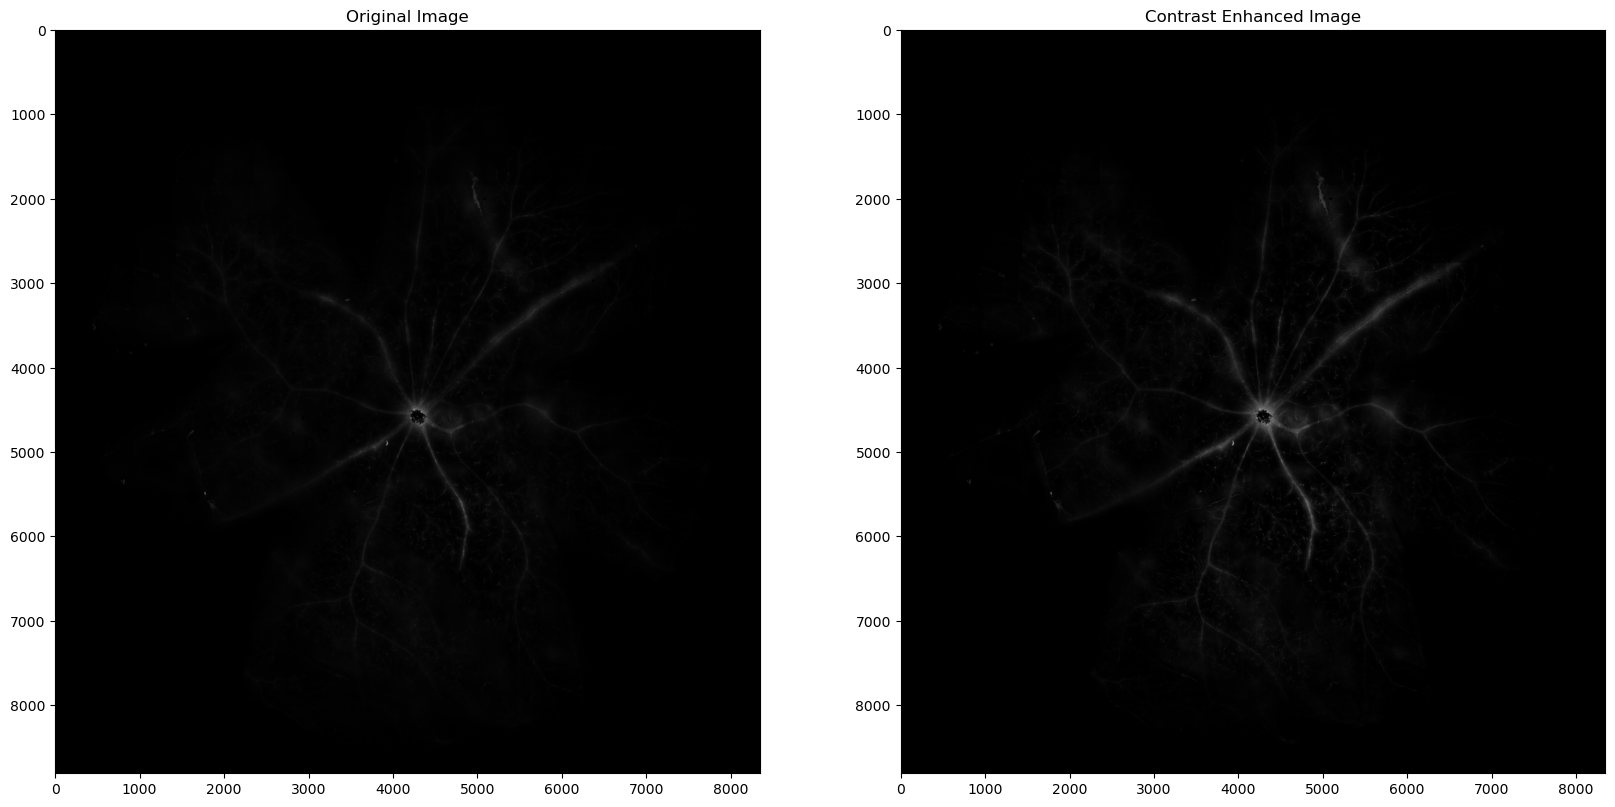

In [40]:
import czifile
import matplotlib.pyplot as plt
from skimage import exposure

# Load the CZI file
img = czifile.imread('Akita_2_OD_25x.czi')

# Get the first slice
slice_img = img[0, 0, 0, 0, 0, :, :, 0]

# Increase the contrast of the image
contrast_img = exposure.rescale_intensity(slice_img, in_range='image')
contrast_img = exposure.equalize_hist(contrast_img)
# Create a figure for the slices
fig, axs = plt.subplots(1, 2, figsize=(20, 10))

# Display the original slice
axs[0].imshow(slice_img, cmap='gray')
axs[0].set_title('Original Image')

# Display the contrast-enhanced slice
axs[1].imshow(contrast_img, cmap='gray')
axs[1].set_title('Contrast Enhanced Image')

# Show the figure
plt.show()

plt.imsave('enhanced_image.png', contrast_img, cmap='gray')


In [39]:
# Loop over each stack
with czifile.CziFile(czi_file_path) as czi:
    image_array = czi.asarray()

# Iterate over the stacks, given your image array shape (1, 1, 1, 1, 18, 8806, 8346, 1)
for stack_index in range(image_array.shape[4]):
    # Extract the stack
    stack = image_array[0, 0, 0, 0, stack_index, :, :, 0]

    contrast_img = exposure.rescale_intensity(stack, in_range='image')
    contrast_img = exposure.equalize_hist(contrast_img)

    plt.imsave(f'enhanced_image_{stack_index}.png', contrast_img, cmap='gray')


In [47]:
from skimage import feature, color, io
import numpy as np
import matplotlib.pyplot as plt

def calculate_lbp(image, points=24, radius=8):
    if len(image.shape) > 2:
        image = color.rgb2gray(image[..., :3])  # Convert to grayscale if not already
    lbp = feature.local_binary_pattern(image, points, radius, method="uniform")
    (hist, _) = np.histogram(lbp.ravel(), bins=np.arange(0, points + 3), range=(0, points + 2))
    hist = hist.astype("float")
    hist /= (hist.sum() + 1e-7)  # Normalize the histogram
    
    # Calculate the entropy of the histogram
    entropy = -np.sum(hist * np.log2(hist + 1e-10))  # Add a small constant to avoid log(0)
    return entropy

lbp_entropies = []

for image_path in image_paths:
    image = io.imread(image_path)  # Ensure you're using io.imread here
    entropy = calculate_lbp(image)
    lbp_entropies.append((image_path, entropy))
    del image  # Free up memory

# Sort the images by their LBP entropy in descending order
lbp_entropies.sort(key=lambda x: x[1], reverse=True)

# Print the paths of the images and their LBP entropy
for image_path, entropy in lbp_entropies:
    print(f'{image_path}: {entropy}')

# Extract the top 10 indices based on entropy
top_10_indices = [i for i, _ in lbp_entropies[:10]]
print(top_10_indices)


c:\Users\alois\anaconda3\Lib\site-packages\skimage\feature\texture.py:353: UserWarning: Applying `local_binary_pattern` to floating-point images may give unexpected results when small numerical differences between adjacent pixels are present. It is recommended to use this function with images of integer dtype.
  warnings.warn(


enhanced_image_7.png: 1.6162188233835741
enhanced_image_6.png: 1.616159093897379
enhanced_image_5.png: 1.608811542649716
enhanced_image_8.png: 1.6050505424850336
enhanced_image_4.png: 1.5964855057919802
enhanced_image_9.png: 1.5894332109536835
enhanced_image_3.png: 1.5785218408026336
enhanced_image_10.png: 1.5696006152509865
enhanced_image_2.png: 1.5552785855481996
enhanced_image_11.png: 1.5476739739195962
enhanced_image_12.png: 1.523853860168371
enhanced_image_1.png: 1.5222822350038534
enhanced_image_13.png: 1.500717933691765
enhanced_image_14.png: 1.4780705086170172
enhanced_image_0.png: 1.4752467042262927
enhanced_image_15.png: 1.4572193234075907
enhanced_image_16.png: 1.4428776782820125
enhanced_image_17.png: 1.430365216449624
['enhanced_image_7.png', 'enhanced_image_6.png', 'enhanced_image_5.png', 'enhanced_image_8.png', 'enhanced_image_4.png', 'enhanced_image_9.png', 'enhanced_image_3.png', 'enhanced_image_10.png', 'enhanced_image_2.png', 'enhanced_image_11.png']


# test with worst image OE 22

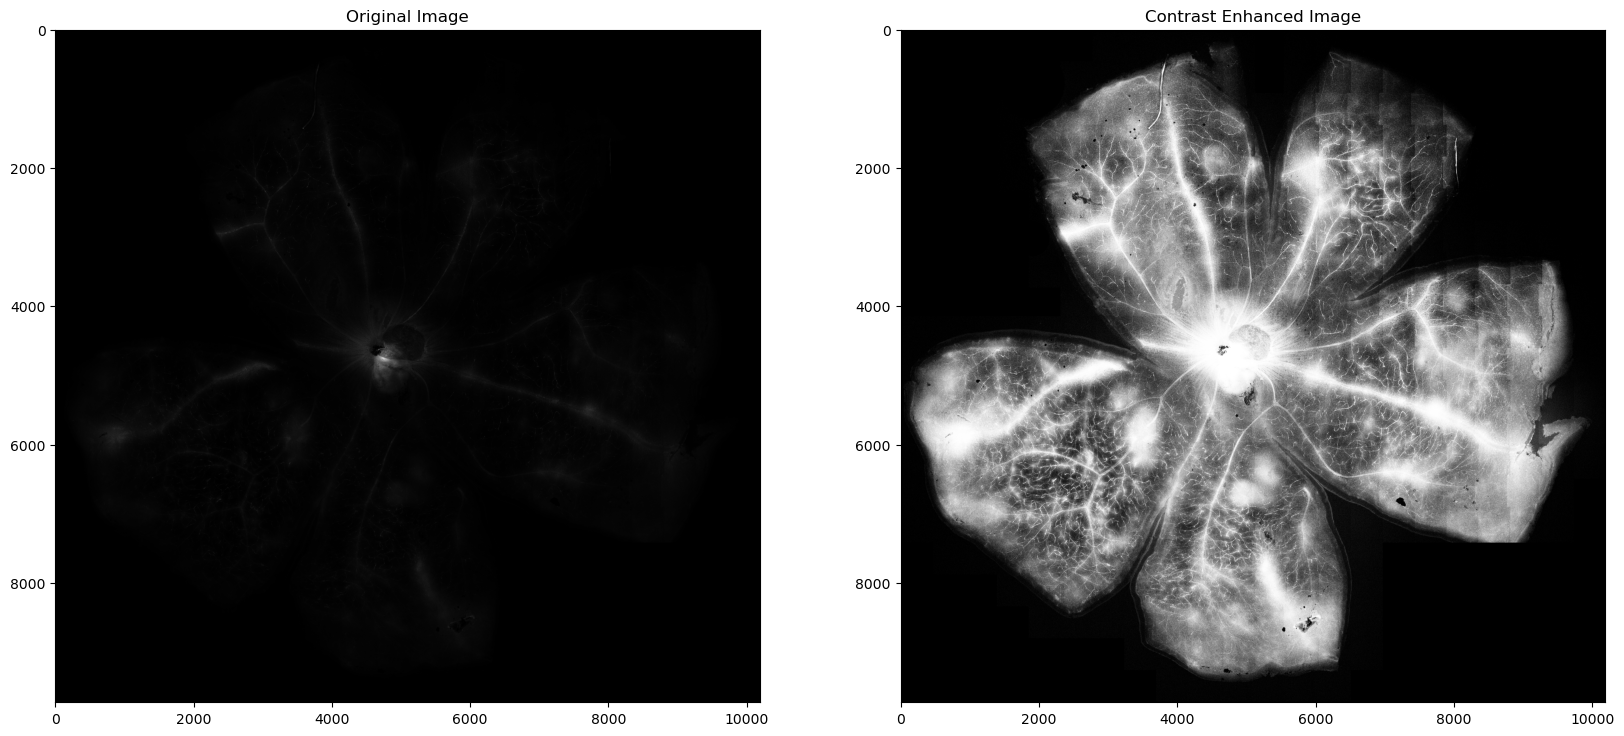

In [48]:
import czifile
import matplotlib.pyplot as plt
from skimage import exposure

# Load the CZI file
img = czifile.imread('Akita_22_OE_25x.czi')

# Get the first slice
slice_img = img[0, 0, 0, 0, 0, :, :, 0]

# Increase the contrast of the image
contrast_img = exposure.rescale_intensity(slice_img, in_range='image')
contrast_img = exposure.equalize_hist(contrast_img)
# Create a figure for the slices
fig, axs = plt.subplots(1, 2, figsize=(20, 10))

# Display the original slice
axs[0].imshow(slice_img, cmap='gray')
axs[0].set_title('Original Image')

# Display the contrast-enhanced slice
axs[1].imshow(contrast_img, cmap='gray')
axs[1].set_title('Contrast Enhanced Image')

# Show the figure
plt.show()

plt.imsave('enhanced_image_OE_22.png', contrast_img, cmap='gray')

In [50]:
import os

# Create the directory if it does not exist
if not os.path.exists('.\OE_22'):
    os.makedirs('.\OE_22')

# Loop over each stack
with czifile.CziFile(czi_file_path) as czi:
    image_array = czi.asarray()

# Iterate over the stacks, given your image array shape (1, 1, 1, 1, 18, 8806, 8346, 1)
for stack_index in range(image_array.shape[4]):
    # Extract the stack
    stack = image_array[0, 0, 0, 0, stack_index, :, :, 0]

    contrast_img = exposure.rescale_intensity(stack, in_range='image')
    contrast_img = exposure.equalize_hist(contrast_img)

    plt.imsave(f'.\OE_22\OE_22_{stack_index}.png', contrast_img, cmap='gray')


In [51]:
lbp_entropies = []

image_paths = [f'.\OE_22\OE_22_{i}.png' for i in range(18)]

for image_path in image_paths:
    image = io.imread(image_path)  # Ensure you're using io.imread here
    entropy = calculate_lbp(image)
    lbp_entropies.append((image_path, entropy))
    del image  # Free up memory

# Sort the images by their LBP entropy in descending order
lbp_entropies.sort(key=lambda x: x[1], reverse=True)

# Print the paths of the images and their LBP entropy
for image_path, entropy in lbp_entropies:
    print(f'{image_path}: {entropy}')

# Extract the top 10 indices based on entropy
top_10_indices = [i for i, _ in lbp_entropies[:10]]
print(top_10_indices)

c:\Users\alois\anaconda3\Lib\site-packages\skimage\feature\texture.py:353: UserWarning: Applying `local_binary_pattern` to floating-point images may give unexpected results when small numerical differences between adjacent pixels are present. It is recommended to use this function with images of integer dtype.
  warnings.warn(


.\OE_22\OE_22_7.png: 1.6162787674982768
.\OE_22\OE_22_6.png: 1.6161639444850944
.\OE_22\OE_22_5.png: 1.6087177036361764
.\OE_22\OE_22_8.png: 1.605060714026527
.\OE_22\OE_22_4.png: 1.5964617821557225
.\OE_22\OE_22_9.png: 1.5894243981201814
.\OE_22\OE_22_3.png: 1.578482128253983
.\OE_22\OE_22_10.png: 1.5695998484267517
.\OE_22\OE_22_2.png: 1.555230054557084
.\OE_22\OE_22_11.png: 1.5477007365496813
.\OE_22\OE_22_12.png: 1.5238736020059669
.\OE_22\OE_22_1.png: 1.522658590719964
.\OE_22\OE_22_13.png: 1.5007319270091732
.\OE_22\OE_22_14.png: 1.4780704256486512
.\OE_22\OE_22_0.png: 1.4752915331360066
.\OE_22\OE_22_15.png: 1.457225341258387
.\OE_22\OE_22_16.png: 1.4428828956173885
.\OE_22\OE_22_17.png: 1.4303305160936457
['.\\OE_22\\OE_22_7.png', '.\\OE_22\\OE_22_6.png', '.\\OE_22\\OE_22_5.png', '.\\OE_22\\OE_22_8.png', '.\\OE_22\\OE_22_4.png', '.\\OE_22\\OE_22_9.png', '.\\OE_22\\OE_22_3.png', '.\\OE_22\\OE_22_10.png', '.\\OE_22\\OE_22_2.png', '.\\OE_22\\OE_22_11.png']
